## Example usage

In [1]:
from Bio import Phylo
import matplotlib as mpl
import matplotlib.pyplot as plt
from io import StringIO
import matplotlib.collections as mpcollections
from copy import copy

import pandas as pd
import numpy as np
import seaborn as sn

from cvmcore.cvmcore import cvmplot

from scipy.cluster.hierarchy import linkage, dendrogram, complete, to_tree
from scipy.spatial.distance import squareform

In [2]:
# %matplotlib inline
# plt.rcParams['svg.fonttype'] = 'none'

In [3]:
mlst = [[np.nan, 19., 12.,  9.,  5.,  9.,  2.],
        [np.nan, 19., 12.,  9.,  5.,  9.,  2.],
        [10., 17., 12.,  9., np.nan,  9.,  2.],
        [10., 19., 12., np.nan,  5.,  9.,  2.],
        [np.nan, 19., 13.,  9.,  5.,  9.,  2.]]
genes = np.char.replace(np.array(np.arange(1, 8), dtype='str'), '', 'gene_', count=1)
samples = np.char.replace(np.array(np.arange(1, 6), dtype='str'), '', 'sample_', count=1)
df_mlst = pd.DataFrame(mlst, index=samples, columns=genes)
diff_matrix = cvmplot.get_diff_df(df_mlst)

In [4]:
diff_matrix

,sample_1,sample_2,sample_3,sample_4,sample_5
sample_1,0,0,1,0,1
sample_2,0,0,1,0,1
sample_3,1,1,0,1,2
sample_4,0,0,1,0,1
sample_5,1,1,2,1,0


In [5]:
link_matrix =linkage(squareform(diff_matrix), method='complete')

In [6]:
link_matrix

array([[0., 1., 0., 2.],
       [3., 5., 0., 3.],
       [2., 6., 1., 4.],
       [4., 7., 2., 5.]])

### Plot a rectangular dendrogram

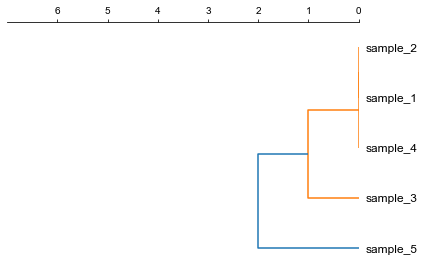

In [7]:
fig, ax= plt.subplots(1,1)
lableorder, ax = cvmplot.rectree(link_matrix, scale_max=7, labels=samples, ax=ax)
fig.tight_layout()
fig.savefig('screenshots/dendrogram.png')

### Plot rectangular dendrogram with heatmap

In [8]:
#create dataframe
mat = np.random.randint(70, 100, (5, 10))
loci = np.char.replace(np.array(np.arange(1, 11), dtype='str'), '', 'loci_', count=1)
sample = np.char.replace(np.array(np.arange(1, 6), dtype='str'), '', 'sample', count=1)
df_heatmap = pd.DataFrame(mat, index=sample, columns=loci)

In [9]:
#create linkage matrix
diff_matrix = [[0, 0, 1, 0, 1],
               [0, 0, 1, 0, 1],
               [1, 1, 0, 1, 2],
               [0, 0, 1, 0, 1],
               [1, 1, 2, 1, 0]]

linkage_matrix = linkage(squareform(diff_matrix),'complete')

[ 5 15 25 35 45]
['sample5', 'sample3', 'sample4', 'sample1', 'sample2']


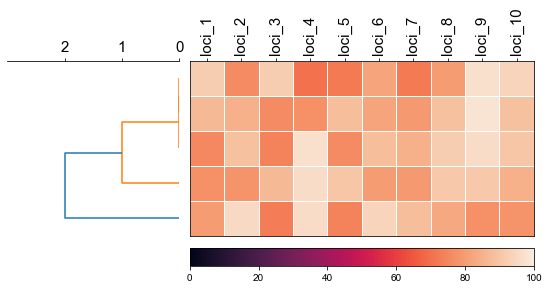

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3), gridspec_kw={'width_ratios': [1, 2]})

fig.tight_layout(w_pad=-2)

row_order, ax1 = cvmplot.rectree(linkage_matrix,labels=sample, no_labels=True, scale_max=3, ax=ax1)
cvmplot.heatmap(df_heatmap, order=row_order, ax=ax2, cbar=True, yticklabel=False)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=15)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=15)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=15)
ax2.xaxis.tick_top()

# fig.tight_layout()
fig.savefig('screenshots/dendrogram_with_heatmap.png', bbox_inches='tight')

### Add more heatmap

[ 5 15 25 35 45]
['sample5', 'sample3', 'sample4', 'sample1', 'sample2']
[ 5 15 25 35 45]
['sample5', 'sample3', 'sample4', 'sample1', 'sample2']


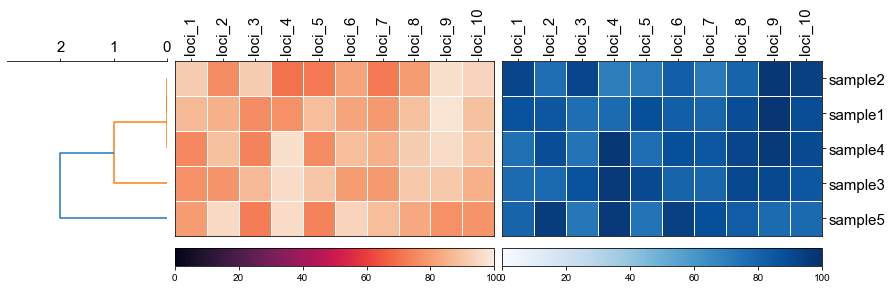

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,3), gridspec_kw={'width_ratios': [1, 2, 2]})

fig.tight_layout(w_pad=-2)

row_order, ax1 = cvmplot.rectree(linkage_matrix,labels=sample, no_labels=True, scale_max=3, ax=ax1)

# remove the yticklabels in ax2
ax2 = cvmplot.heatmap(df_heatmap, order=row_order, ax=ax2, cbar=True, yticklabel=False)
# add ax3 heatmap
ax3 = cvmplot.heatmap(df_heatmap, order=row_order, ax=ax3, cmap='Blues', cbar=True, yticklabel=True)

#set ticklabels property of x or y from ax1, ax2, ax3
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=15)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=15)
ax2.xaxis.tick_top()

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, fontsize=15)
ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=15)
ax3.xaxis.tick_top()


# fig.tight_layout()
fig.savefig('screenshots/multiple_heatmap.png', bbox_inches='tight')

#### set minimum value of heatmap

[ 5 15 25 35 45]
['sample5', 'sample3', 'sample4', 'sample1', 'sample2']


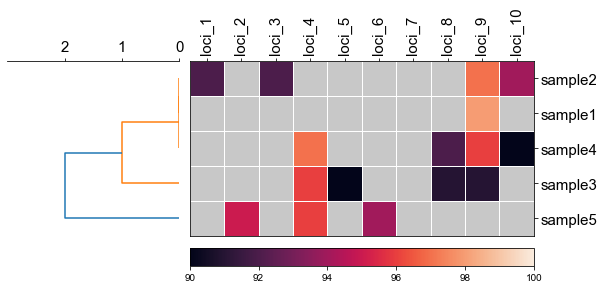

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3), gridspec_kw={'width_ratios': [1, 2]})
fig.tight_layout(w_pad=-2)

order, ax1 = cvmplot.rectree(linkage_matrix,labels=sample, no_labels=True, scale_max=3, ax=ax1)
cvmplot.heatmap(df_heatmap, order=order, ax=ax2, cbar=True, vmin=90)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=15)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=15)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=15)
ax2.xaxis.tick_top()

fig.savefig('Screenshots/dendrogram_heatmap_minimumvalue.png', bbox_inches='tight')

#### using cmap to change color

[ 5 15 25 35 45]
['sample5', 'sample3', 'sample4', 'sample1', 'sample2']


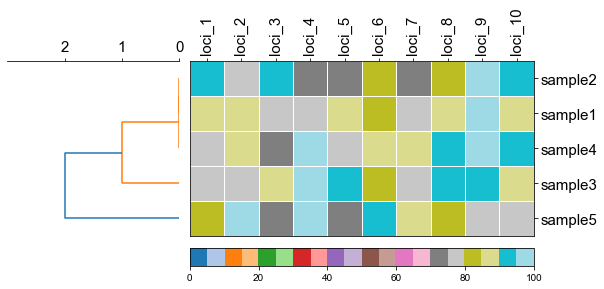

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3), gridspec_kw={'width_ratios': [1, 2]})
fig.tight_layout(w_pad=-2)

order, ax1 = cvmplot.rectree(linkage_matrix,labels=sample, no_labels=True, scale_max=3, ax=ax1)
cvmplot.heatmap(df_heatmap, order=order, ax=ax2, cmap='tab20', cbar=True)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=15)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=15)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=15)
ax2.xaxis.tick_top()
fig.savefig('screenshots/dendrogram_heatmap_cmap.png',bbox_inches='tight')

### Plot a circular dendrogram

In [14]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)

In [15]:
Z = linkage(X, 'ward')

In [16]:
Z2 = dendrogram(Z, no_plot=True)

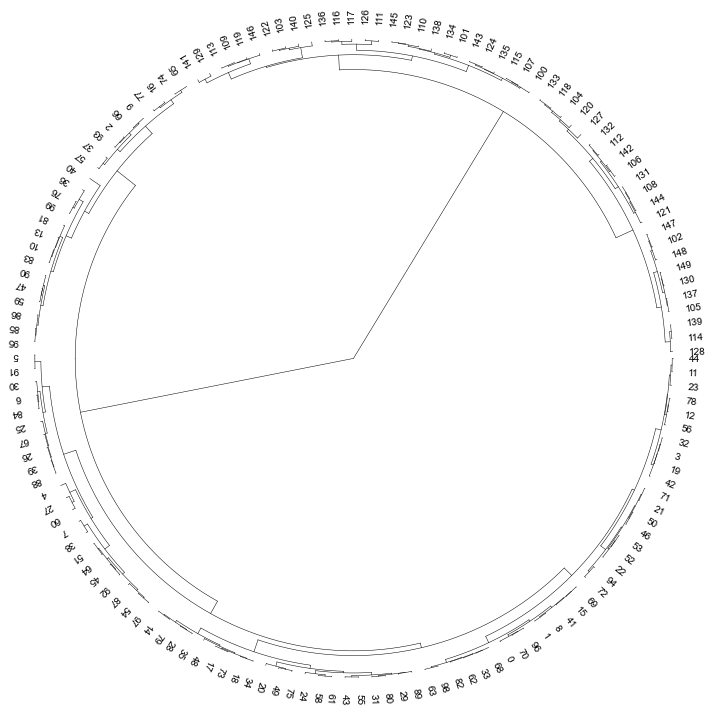

In [17]:
# set open angle
fig, ax= plt.subplots(1,1,figsize=(10,10))

cvmplot.circulartree(Z2,addlabels=True, fontsize=10, ax=ax)
fig.tight_layout()
fig.savefig('screenshots/circular_dendrogram.png', bbox_inches='tight')

#### color label

In [18]:
colors = [{'#0070c7':'2021'}, {'#3a9245':'2022'}, {'#f8d438':'2023'}]
result = np.random.choice(colors, size=150)
label_colors_map = dict(zip(Z2['ivl'], result))
point_colors_map = dict(zip(Z2['ivl'], result))

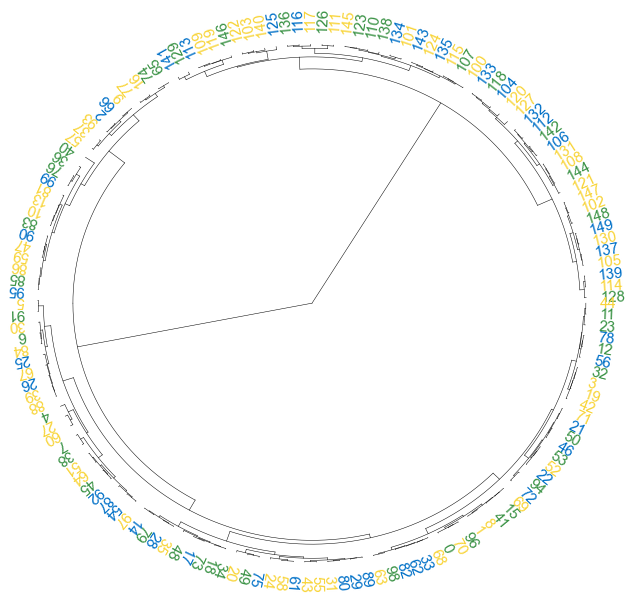

In [19]:
fig, ax= plt.subplots(1,1,figsize=(10,10))
cvmplot.circulartree(Z2, addlabels=True, branch_color=False, label_colors= label_colors_map, fontsize=15)
# fig.tight_layout()
fig.savefig('screenshots/circular_dendrogram_color_label.png', bbox_inches='tight')

#### set open angle

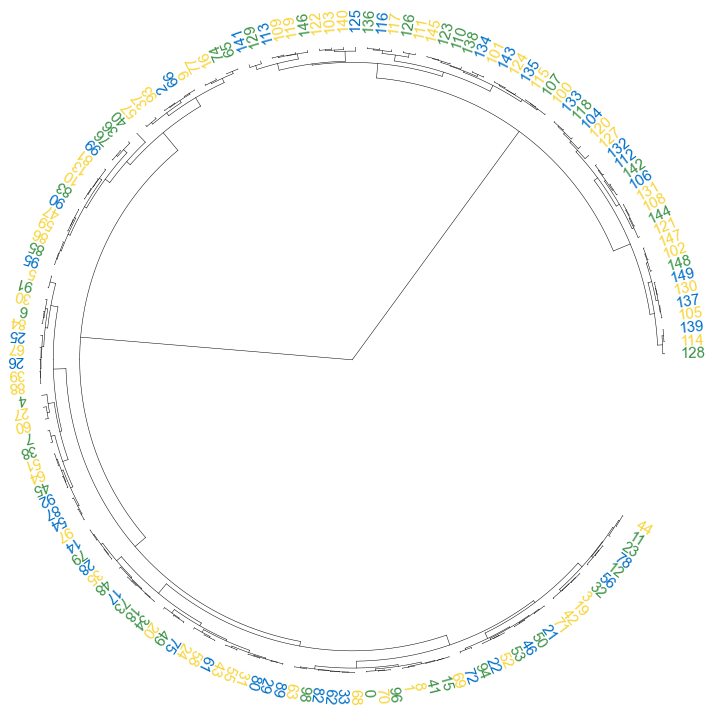

In [20]:
fig, ax= plt.subplots(1,1,figsize=(10,10))
cvmplot.circulartree(Z2, addlabels=True, branch_color=False, label_colors= label_colors_map, fontsize=15, open_angle=30)
fig.tight_layout()
fig.savefig('screenshots/circular_dendrogram_openangle.png', bbox_inches='tight')

#### set start angle

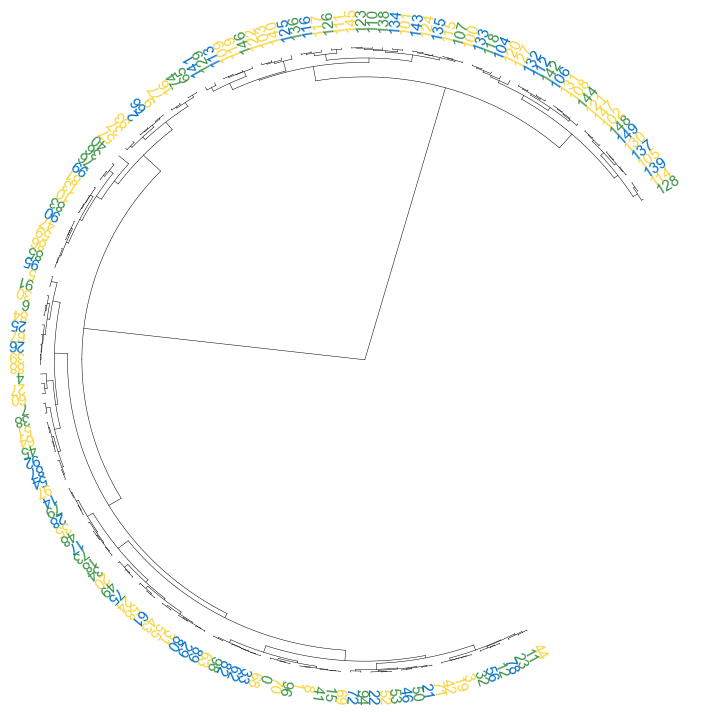

In [21]:
fig, ax= plt.subplots(1,1,figsize=(10,10))
cvmplot.circulartree(Z2, addlabels=True, branch_color=False, label_colors= label_colors_map, fontsize=15, open_angle=90,
                     start_angle=30
                    )
fig.tight_layout()
fig.savefig('screenshots/circular_dendrogram_startangle.png')

#### add point 

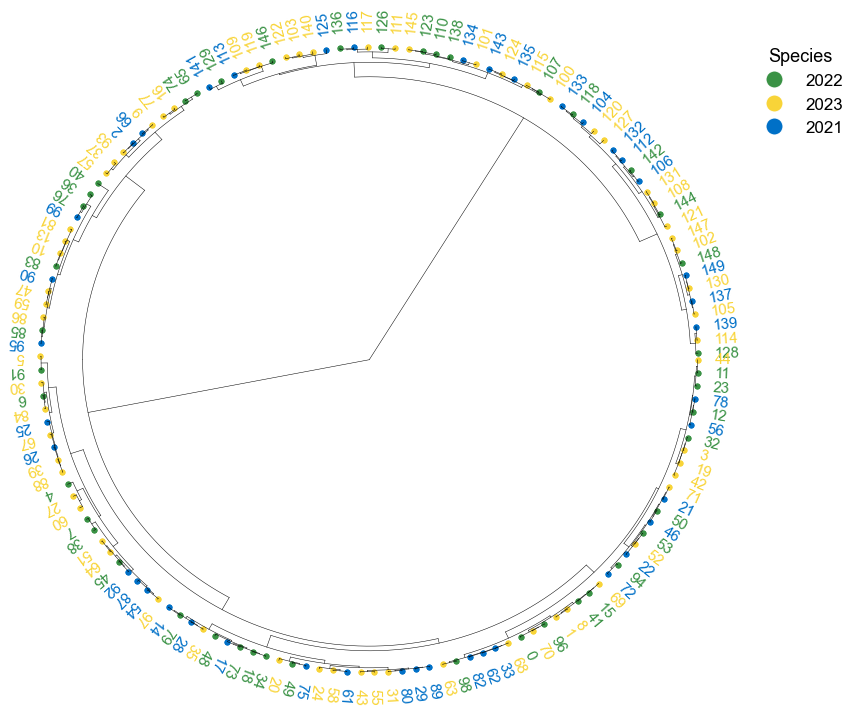

In [22]:
fig, ax= plt.subplots(1,1,figsize=(12,10))
cvmplot.circulartree(Z2, addlabels=True, branch_color=False, label_colors= label_colors_map, fontsize=15, addpoints=True,
                     point_colors = point_colors_map, point_legend_title='Species', pointsize=25)
fig.tight_layout()
fig.savefig('screenshots/circular_dendrogram_tippoints.png')

### Plot phylogenetic tree

In [23]:
tree = "(((A:0.2, B:0.3):0.3,(C:0.5, D:0.3):0.2):0.3, E:0.7):1.0;"
tree = Phylo.read(StringIO(tree), 'newick')

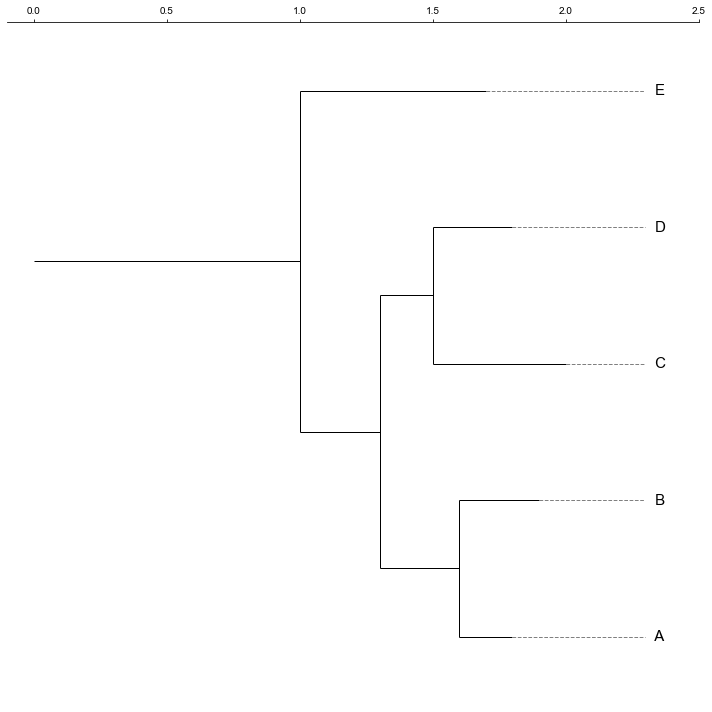

In [24]:
fig, ax= plt.subplots(1,1, figsize=(10, 10))
ax, lable_order = cvmplot.phylotree(tree=tree, color='k', lw=1, ax=ax, show_label=True, align_label=True, labelsize=15)
fig.tight_layout()
fig.savefig('screenshots/phylogenetic_tree.png')

#### Plot tree with heatmap

In [25]:
#create dataframe
mat = np.random.randint(70, 100, (5, 10))
col = np.char.replace(np.array(np.arange(1, 11), dtype='str'), '', 'column_', count=1)
strains = ['A', 'B', 'C', 'D', 'E']
df_heatmap = pd.DataFrame(mat, index=strains, columns=col)

In [26]:
df_heatmap

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10
A,89,73,91,75,95,90,93,74,99,97
B,73,90,75,89,85,72,82,85,96,82
C,84,82,86,74,72,75,91,83,97,98
D,72,77,72,98,79,73,87,91,98,94
E,88,75,88,73,77,72,74,73,99,86


[ 5 15 25 35 45]
['A', 'B', 'C', 'D', 'E']


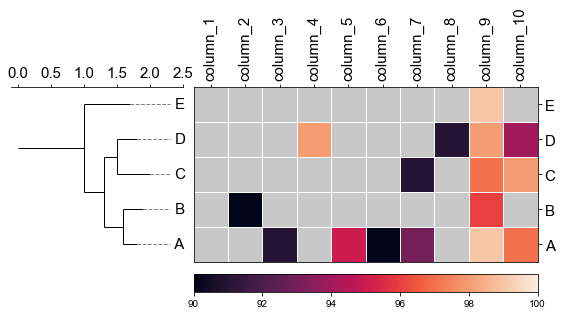

In [27]:
fig,(ax1, ax2)= plt.subplots(1,2, figsize=(8, 3), gridspec_kw={'width_ratios':[1, 2]})
fig.tight_layout(w_pad=-2)
ax1, order = cvmplot.phylotree(tree=tree, color='k', lw=1, ax=ax1, show_label=True, align_label=True, labelsize=15)
cvmplot.heatmap(df_heatmap, order=order, ax=ax2, cbar=True, vmin=90)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=15)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=15)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=15)
ax2.xaxis.tick_top()

fig.savefig('screenshots/phylotree_with_heatmap.png', bbox_inches='tight')

#### remove labels at the tip of the tree

[ 5 15 25 35 45]
['A', 'B', 'C', 'D', 'E']


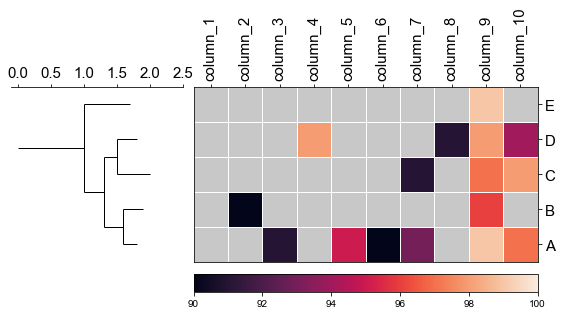

In [28]:
fig,(ax1, ax2)= plt.subplots(1,2, figsize=(8, 3), gridspec_kw={'width_ratios':[1, 2]})
fig.tight_layout(w_pad=-2)
ax1, order = cvmplot.phylotree(tree=tree, color='k', lw=1, ax=ax1, show_label=False)
cvmplot.heatmap(df_heatmap, order=order, ax=ax2, cbar=True, vmin=90)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=15)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=15)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=15)
ax2.xaxis.tick_top()

fig.savefig('screenshots/phylotree_with_heatmap-remove_tiplabel.png', bbox_inches='tight')

[ 5 15 25 35 45]
['A', 'B', 'C', 'D', 'E']
[ 5 15 25 35 45]
['A', 'B', 'C', 'D', 'E']


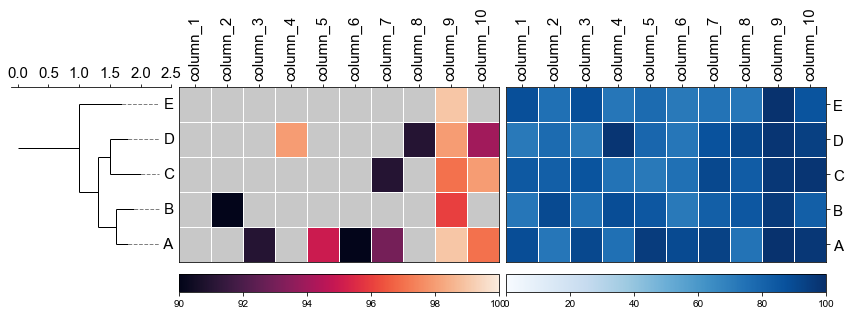

In [29]:
fig,(ax1, ax2, ax3)= plt.subplots(1,3, figsize=(12, 3), gridspec_kw={'width_ratios':[1, 2, 2]})
fig.tight_layout(w_pad=-2)
ax1, order = cvmplot.phylotree(tree=tree, color='k', lw=1, ax=ax1, show_label=True, align_label=True, labelsize=15)
ax2 = cvmplot.heatmap(df_heatmap, order=order, ax=ax2, cbar=True, vmin=90, yticklabel=False)
# add ax3 heatmap
ax3 = cvmplot.heatmap(df_heatmap, order=order, ax=ax3, cmap='Blues', cbar=True, yticklabel=True)

#set ticklabels property of x or y from ax1, ax2, ax3
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=15)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=15)
ax2.xaxis.tick_top()

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, fontsize=15)
ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=15)
ax3.xaxis.tick_top()


# fig.tight_layout()
fig.savefig('screenshots/phylotree_multiple_heatmap.png', bbox_inches='tight')

### Plot gene arrows

#### Read arrow dataframe(could be generated from gff file)

In [30]:
df = pd.read_csv('gene_feature.csv')

In [31]:
df

,TRACK,START,END,STRAND,LABEL,COLOR
0,A,100,900,-1,label1,#ec9631
1,A,1100,1300,1,label2,#ec9631
2,A,1350,1500,1,label3,#ec9631
3,A,1520,1700,1,label4,#ec9631
4,A,1900,2200,-1,label5,#ec9631
...,...,...,...,...,...,...
60,E,3100,3500,1,label61,#ec9631
61,E,3600,3800,-1,label62,#ec9631
62,E,3900,4200,-1,label63,#ec9631
63,E,4300,4700,-1,label64,#ec9631


In [32]:
arrow_dict = {k: g.to_dict(orient='records') for k, g in df.set_index('TRACK').groupby(level=0)}

#### Plot arrows

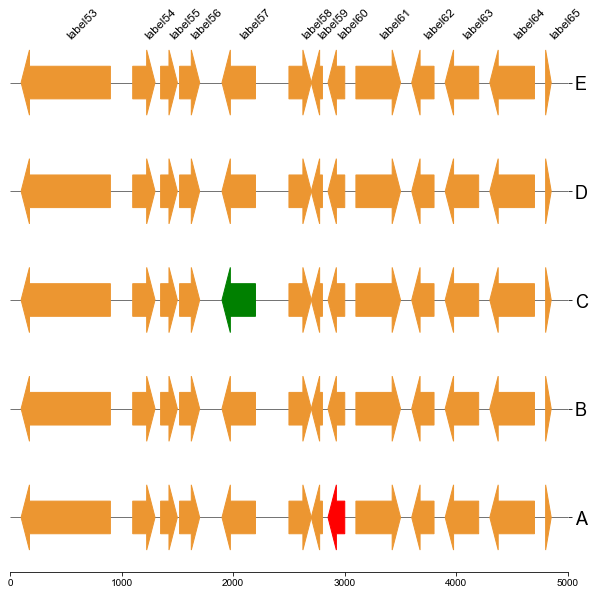

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax = cvmplot.plotgenes(dc=arrow_dict, order=order, ax=ax, max_track_size=5000, addlabels=True, label_track='top')
fig.savefig('screenshots/gene_arrow_top.png', bbox_inches='tight')

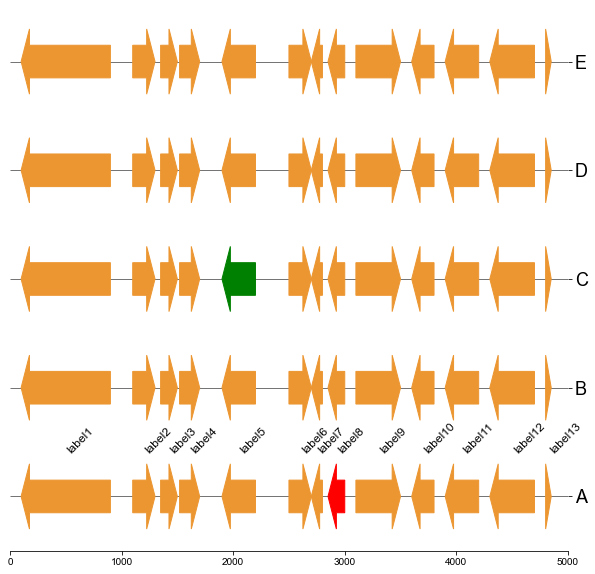

In [34]:
# add label on the bottom track
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax = cvmplot.plotgenes(dc=arrow_dict, order=order, ax=ax, max_track_size=5000, addlabels=True, label_track='bottom')
fig.savefig('screenshots/gene_arrow_bottom.png', bbox_inches='tight')

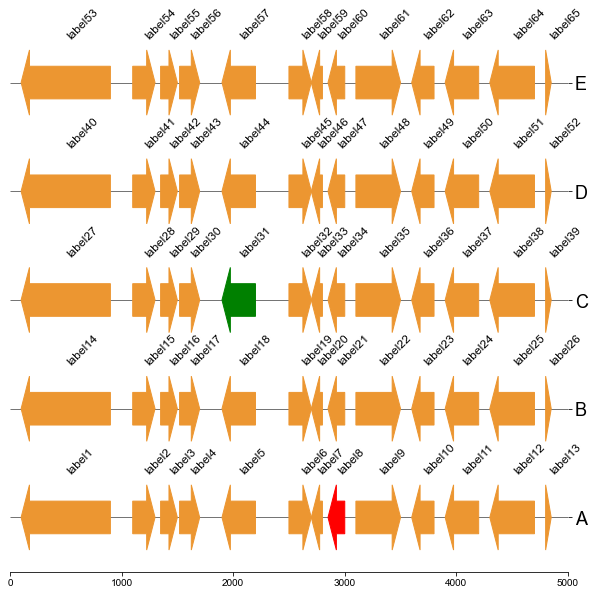

In [35]:
# add label on all track
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax = cvmplot.plotgenes(dc=arrow_dict, order=order, ax=ax, max_track_size=5000, addlabels=True, label_track='all')
fig.savefig('Screenshots/gene_arrow_all.png', bbox_inches='tight')

[ 5 15 25 35 45]
['A', 'B', 'C', 'D', 'E']
[ 5 15 25 35 45]
['A', 'B', 'C', 'D', 'E']


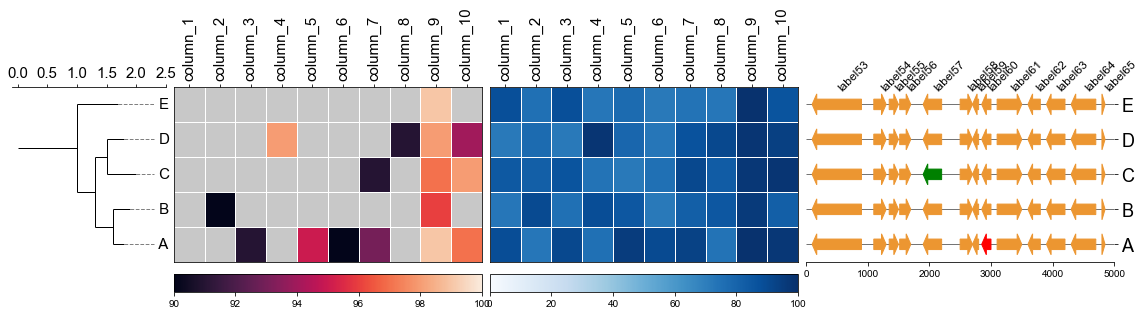

In [36]:
# Put together
fig,(ax1, ax2, ax3, ax4)= plt.subplots(1,4, figsize=(16, 3), gridspec_kw={'width_ratios':[1, 2, 2, 2]})
fig.tight_layout(w_pad=-2)
ax1, order = cvmplot.phylotree(tree=tree, color='k', lw=1, ax=ax1, show_label=True, align_label=True, labelsize=15)
ax2 = cvmplot.heatmap(df_heatmap, order=order, ax=ax2, cbar=True, vmin=90, yticklabel=False)
# add ax3 heatmap
ax3 = cvmplot.heatmap(df_heatmap, order=order, ax=ax3, cmap='Blues', cbar=True, yticklabel=False)

ax4 = cvmplot.plotgenes(dc=arrow_dict, order=order, ax=ax4, max_track_size=5000, addlabels=True, label_track='top', ylim=(-3, 3))



#set ticklabels property of x or y from ax1, ax2, ax3
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=15)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=15)
ax2.xaxis.tick_top()

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, fontsize=15)
ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=15)
ax3.xaxis.tick_top()


# fig.tight_layout()
fig.savefig('screenshots/phylotree_heatmap_withgenes.png', bbox_inches='tight')